In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("iris.csv")

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.shape

(150, 5)

In [31]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.describe(include="object")

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
for colonne in df.columns:
    valeurs_uniques = df[colonne].unique()
    print(f"Colonnes '{colonne}' - Valeurs uniques : {valeurs_uniques}")

Colonnes 'sepal_length' - Valeurs uniques : [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
Colonnes 'sepal_width' - Valeurs uniques : [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
Colonnes 'petal_length' - Valeurs uniques : [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
Colonnes 'petal_width' - Valeurs uniques : [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Colonnes 'species' - Valeurs uniques : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\sassi\AppData\Local\Temp\ipykernel_17980\3332846147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


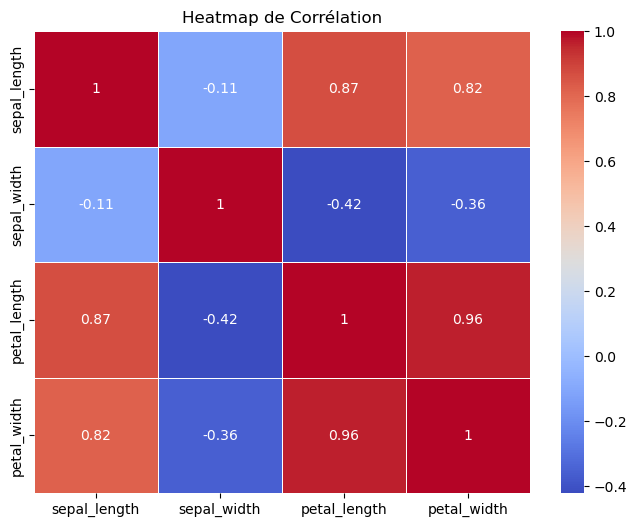

In [36]:
# Calculez la matrice de corrélation
correlation_matrix = df.corr()
# Créez un heatmap à partir de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Corrélation')
plt.show()

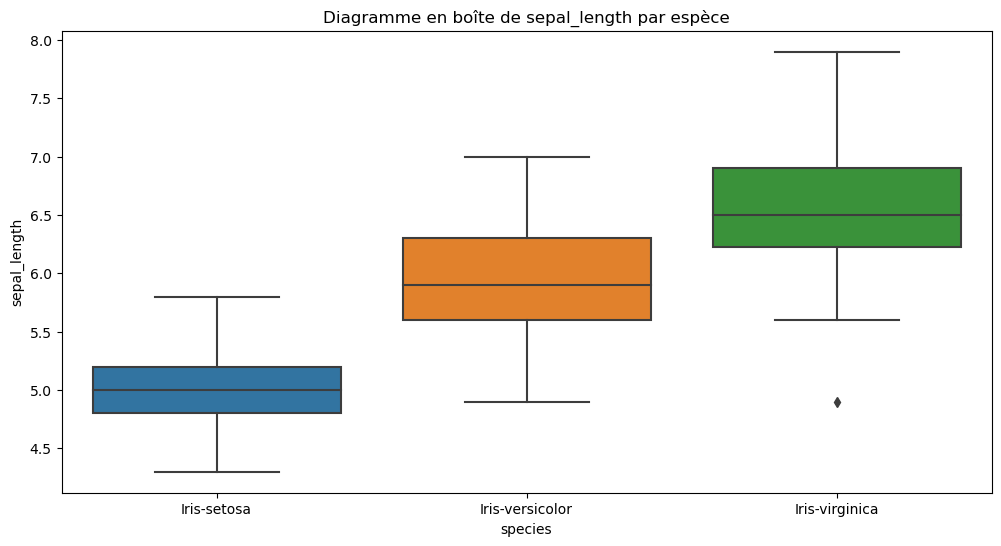

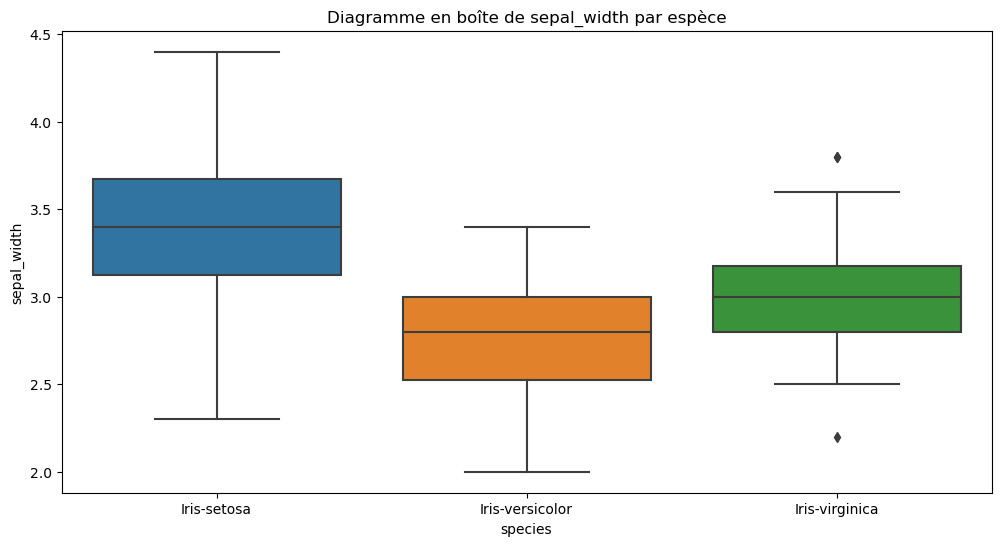

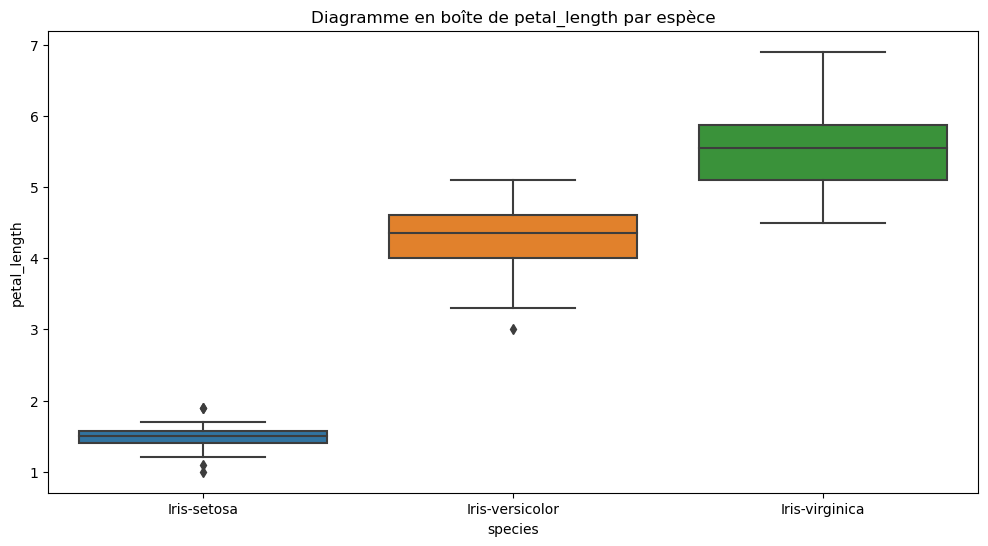

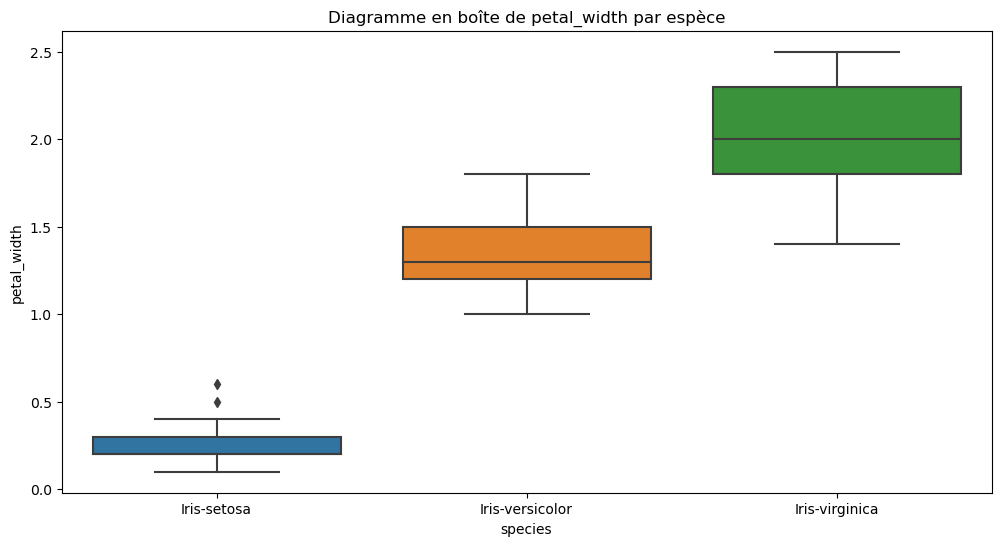

In [37]:
# Liste des variables numériques à visualiser
numeric_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Boucle pour créer des boîtes pour chaque variable en fonction de l'espèce
for var in numeric_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='species', y=var)
    plt.title(f'Diagramme en boîte de {var} par espèce')
    plt.show()


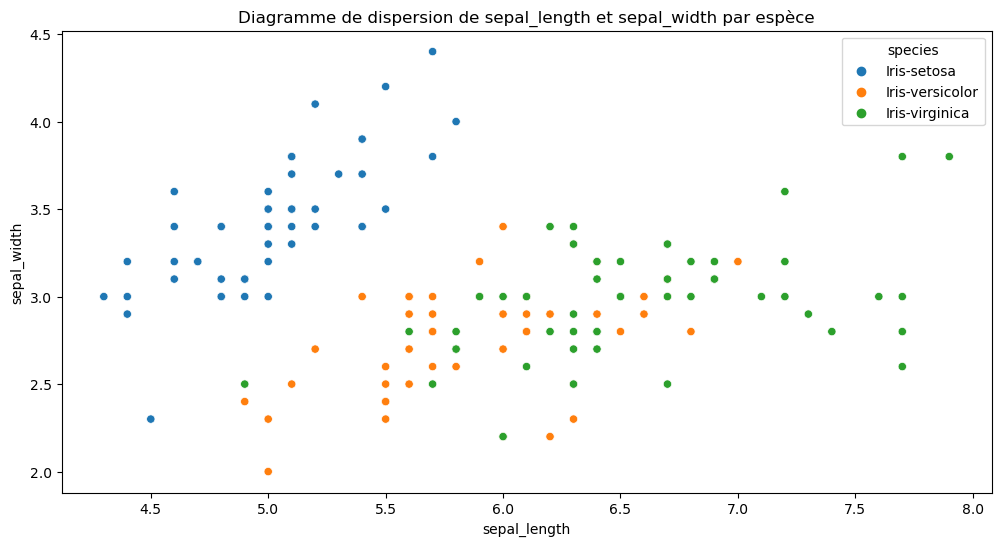

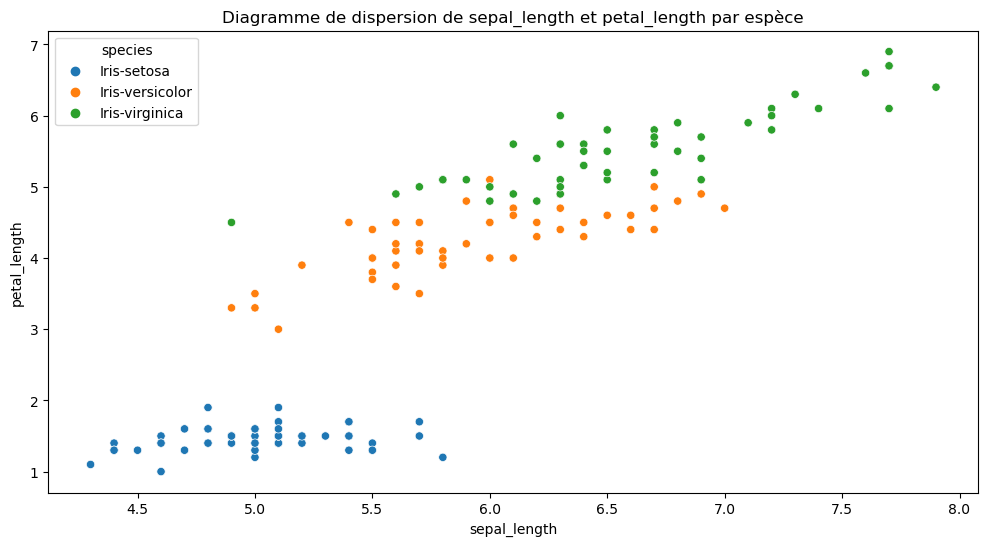

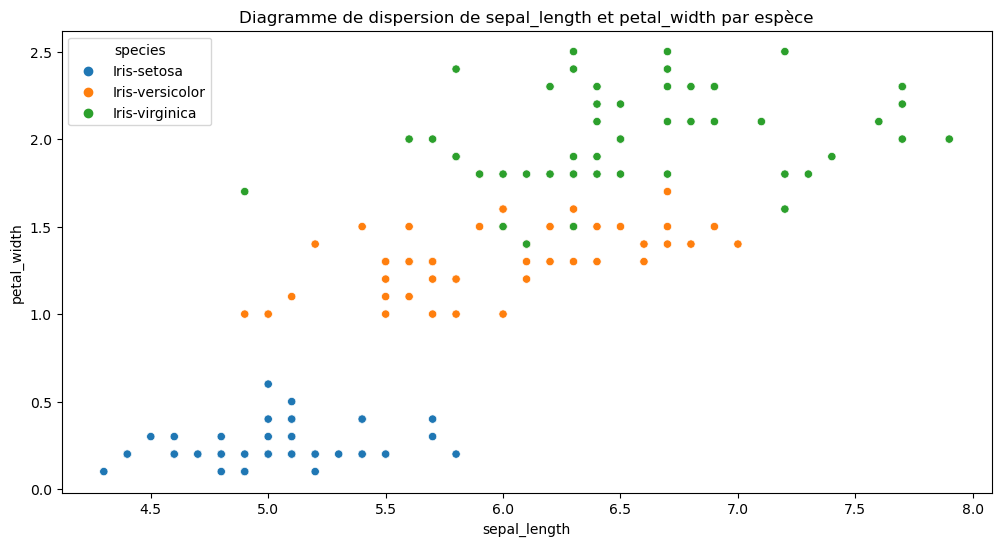

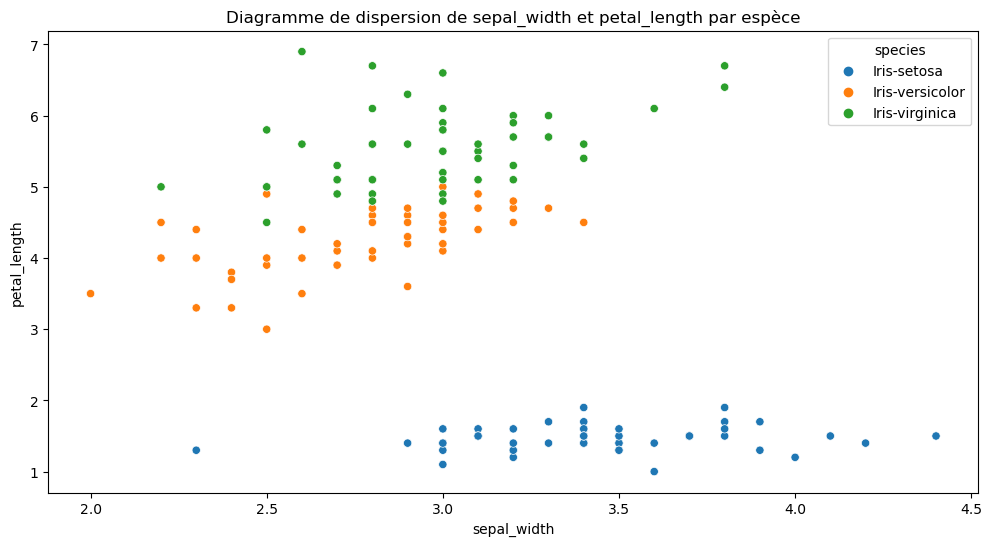

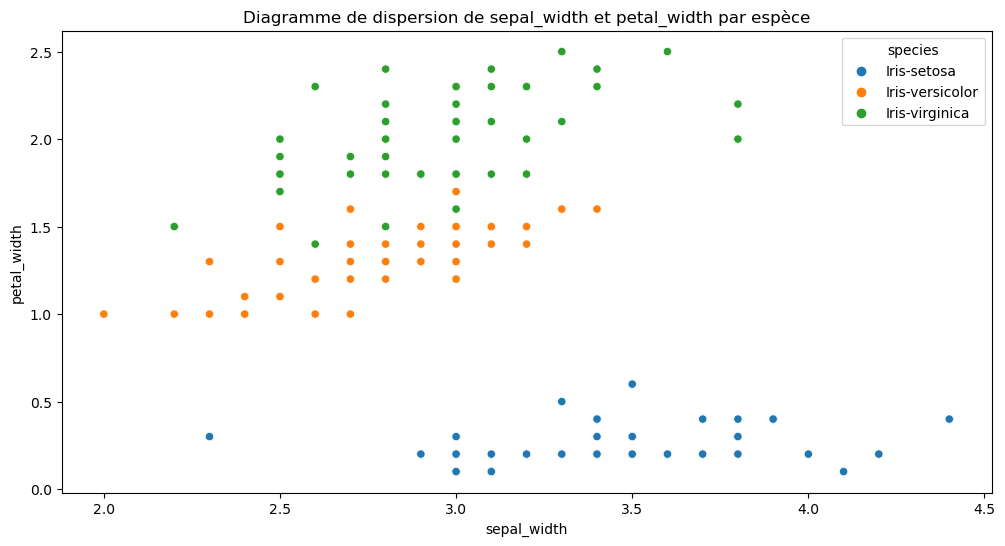

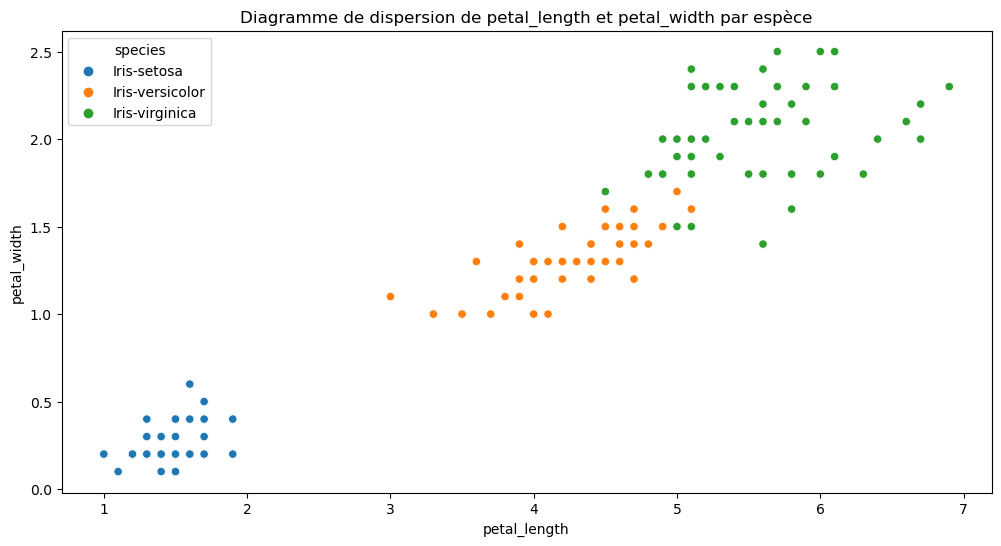

In [38]:
# Liste des paires de variables pour créer des diagrammes de dispersion
var_pairs = [('sepal_length', 'sepal_width'),
             ('sepal_length', 'petal_length'),
             ('sepal_length', 'petal_width'),
             ('sepal_width', 'petal_length'),
             ('sepal_width', 'petal_width'),
             ('petal_length', 'petal_width')]

# Boucle pour créer des diagrammes de dispersion pour chaque paire de variables en fonction de l'espèce
for var_pair in var_pairs:
    x_var, y_var = var_pair
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=x_var, y=y_var, hue='species')
    plt.title(f'Diagramme de dispersion de {x_var} et {y_var} par espèce')
    plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
# Créer un objet LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage à la colonne 'species'
df['species'] = label_encoder.fit_transform(df['species'])
df.drop("species_encoded",axis=1)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
df['species'].unique()

array([0, 1, 2], dtype=int64)

In [69]:
x=df.drop("species",axis=1)

In [70]:
y=df["species"]

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [84]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred = DT.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# Création du modèle KNN pour la classification (avec k=5 voisins)
KN = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle
KN.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = KN.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [93]:
from sklearn.linear_model import LogisticRegression
# Création du modèle de régression logistique pour la classification
lr= LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle
lr.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = lr.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [96]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
# Entraînement du modèle
RFC.fit(x_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = RFC.predict(x_test)
# Évaluation des performances
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
